# Pokemon Visualizations 1-7 gen

## About this project
This project aims to explore some information using few datasets with Pokemon data, then create a model using Pokemon battle dataset to predict which Pokemon would win a 1x1 battle.

### Import data

In [10]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [11]:
sns.set()
sns.set(rc={'figure.figsize':(14,10)})

## Merge Pokemon datasets

In [12]:
df = pd.read_csv('Pokemon.csv')
df2 = pd.read_csv('pokemon2.csv')
df3 = df.merge(df2, on=['#'], how='right')
df = df3

In [13]:
df.head()

,#,Name_x,Type 1_x,Type 2_x,Total,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Weight,Base Experience,Type 1_y,Type 2_y,HP_y,Attack_y,Defense_y,Speed_y,Sp. Atk_y,Sp. Def_y
0,1,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,...,6.9,64,grass,poison,45,49,49,45,65,65
1,2,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,...,13.0,142,grass,poison,60,62,63,60,80,80
2,3,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,...,100.0,236,grass,poison,80,82,83,80,100,100
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,...,100.0,236,grass,poison,80,82,83,80,100,100
4,4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,...,8.5,62,fire,NaN,39,52,43,65,60,50


In [14]:
df.tail()

,#,Name_x,Type 1_x,Type 2_x,Total,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Weight,Base Experience,Type 1_y,Type 2_y,HP_y,Attack_y,Defense_y,Speed_y,Sp. Atk_y,Sp. Def_y
881,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.8,189,poison,NaN,67,73,67,73,73,67
882,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,243,poison,dragon,73,73,73,121,127,73
883,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,820.0,257,rock,steel,61,131,211,13,53,101
884,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,257,fire,ghost,53,127,53,107,151,79
885,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.5,270,electric,NaN,88,112,75,143,102,80


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 885
Data columns (total 26 columns):
#                  886 non-null int64
Name_x             800 non-null object
Type 1_x           800 non-null object
Type 2_x           414 non-null object
Total              800 non-null float64
HP_x               800 non-null float64
Attack_x           800 non-null float64
Defense_x          800 non-null float64
Sp. Atk_x          800 non-null float64
Sp. Def_x          800 non-null float64
Speed_x            800 non-null float64
Generation_x       800 non-null float64
Legendary          800 non-null object
Name_y             886 non-null object
Generation_y       886 non-null int64
Height             886 non-null float64
Weight             886 non-null float64
Base Experience    886 non-null int64
Type 1_y           886 non-null object
Type 2_y           461 non-null object
HP_y               886 non-null int64
Attack_y           886 non-null int64
Defense_y          886 non-null 

In [16]:
df.describe()

,#,Total,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Generation_y,Height,Weight,Base Experience,HP_y,Attack_y,Defense_y,Speed_y,Sp. Atk_y,Sp. Def_y
count,886.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,401.803612,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,3.680587,1.208804,65.532731,150.958239,69.475169,77.804740,72.900677,67.584650,71.585779,71.348758
std,231.098223,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,1.917686,1.127585,117.270966,76.450534,25.722925,30.021559,29.829255,28.207887,30.503144,27.228708
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,206.250000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,2.000000,0.600000,9.325000,67.000000,50.000000,55.000000,50.000000,45.000000,50.000000,50.000000
50%,397.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,4.000000,1.000000,29.000000,159.000000,65.000000,75.000000,70.000000,65.000000,65.000000,70.000000
75%,602.750000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,5.000000,1.500000,68.150000,184.750000,80.000000,100.000000,90.000000,90.000000,95.000000,88.750000
max,807.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


### Fix legendary

In [17]:
gen7_legendary_numbers = [772, 773, 785, 786, 787, 788, 789, 790, 791, 792, 800]
df.loc[df['Generation_y'] == 7, 'Legendary'] = False

df.loc[df['#'].isin(gen7_legendary_numbers), 'Legendary'] = True

### Fix all status

In [18]:
x_columns = ['Name','Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']

for column in x_columns:
    df.loc[df[column+'_x'].isna(), column+'_x'] = df[column+'_y']

### Remove '_y' columns and rename '_x' columns

In [19]:
df = df.drop(columns=['Name_y', 'Type 1_y','Type 2_y','Total','HP_y','Attack_y','Defense_y','Sp. Atk_y','Sp. Def_y','Speed_y','Generation_y'], axis=1)
df.rename(columns=lambda x: x.replace('_x', ''), inplace=True)

df['Type 1'] = map(lambda x: str(x).capitalize(), df['Type 1'])
df['Type 2'] = map(lambda x: x if x != x else str(x).capitalize(), df['Type 2'])
df['Name'] = map(lambda x: str(x).capitalize(), df['Name'])

df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62


In [20]:
df.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience
881,803,Poipole,Poison,NaN,67.0,73.0,67.0,73.0,67.0,73.0,7.0,False,0.6,1.8,189
882,804,Naganadel,Poison,Dragon,73.0,73.0,73.0,127.0,73.0,121.0,7.0,False,3.6,150.0,243
883,805,Stakataka,Rock,Steel,61.0,131.0,211.0,53.0,101.0,13.0,7.0,False,5.5,820.0,257
884,806,Blacephalon,Fire,Ghost,53.0,127.0,53.0,151.0,79.0,107.0,7.0,False,1.8,13.0,257
885,807,Zeraora,Electric,NaN,88.0,112.0,75.0,102.0,80.0,143.0,7.0,False,1.5,44.5,270


### Adding Mega evolution column

In [21]:
df['Mega'] = False

In [22]:
df.loc[df['Name'].str.contains("mega "), 'Mega'] = True

In [23]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False


In [24]:
df.loc[df['Name'].str.contains("Mega")]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
168,154,Meganium,Grass,NaN,80.0,82.0,100.0,83.0,100.0,80.0,2.0,False,1.8,100.5,236,False


In [25]:
types1 = df['Type 1'].unique()
types1_colors = ['#7AC74C', '#EE8130', '#6390F0', '#A6B91A', 
                 '#A8A77A', '#A33EA1', '#F7D02C', '#E2BF65', '#D685AD', '#C22E28', '#F95587', '#B6A136',
                 '#735797', '#96D9D6', '#6F35FC', '#705746', '#B7B7CE', '#A98FF3'
                ]

type1_colors = {}

for i, type1 in enumerate(types1):
    type1_colors[type1] = types1_colors[i]

### Remove mega/duplicates/multiple form pokemon

In [26]:
df[df["Name"].str.contains(' forme')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
428,386,Deoxysnormal forme,Psychic,NaN,50.0,150.0,50.0,150.0,50.0,150.0,3.0,True,1.7,60.8,270,False
429,386,Deoxysattack forme,Psychic,NaN,50.0,180.0,20.0,180.0,20.0,150.0,3.0,True,1.7,60.8,270,False
430,386,Deoxysdefense forme,Psychic,NaN,50.0,70.0,160.0,70.0,160.0,90.0,3.0,True,1.7,60.8,270,False
431,386,Deoxysspeed forme,Psychic,NaN,50.0,95.0,90.0,95.0,90.0,180.0,3.0,True,1.7,60.8,270,False
544,487,Giratinaaltered forme,Ghost,Dragon,150.0,100.0,120.0,100.0,120.0,90.0,4.0,True,4.5,750.0,306,False
545,487,Giratinaorigin forme,Ghost,Dragon,150.0,120.0,100.0,120.0,100.0,90.0,4.0,True,4.5,750.0,306,False
550,492,Shayminland forme,Grass,NaN,100.0,100.0,100.0,100.0,100.0,100.0,4.0,True,0.2,2.1,270,False
551,492,Shayminsky forme,Grass,Flying,100.0,103.0,75.0,120.0,75.0,127.0,4.0,True,0.2,2.1,270,False
702,641,Tornadusincarnate forme,Flying,NaN,79.0,115.0,70.0,125.0,80.0,111.0,5.0,True,1.5,63.0,261,False
703,641,Tornadustherian forme,Flying,NaN,79.0,100.0,80.0,110.0,90.0,121.0,5.0,True,1.5,63.0,261,False


In [27]:
df_unique = df.drop_duplicates(subset="#")
df_unique

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False
5,5,Charmeleon,Fire,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1.0,False,1.1,19.0,142,False
6,6,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,False,1.7,90.5,240,False
9,7,Squirtle,Water,NaN,44.0,48.0,65.0,50.0,64.0,43.0,1.0,False,0.5,9.0,63,False
10,8,Wartortle,Water,NaN,59.0,63.0,80.0,65.0,80.0,58.0,1.0,False,1.0,22.5,142,False
11,9,Blastoise,Water,NaN,79.0,83.0,100.0,85.0,105.0,78.0,1.0,False,1.6,85.5,239,False
13,10,Caterpie,Bug,NaN,45.0,30.0,35.0,20.0,20.0,45.0,1.0,False,0.3,2.9,39,False


In [28]:
df_noforme = df[~df["Name"].str.contains(' forme')]

### Visualizations

Now we'll see some visualizations about those pokemon status/information like battle stats (atk, defense, speed...)
and compare all the differences. Each pokemon type (water, fire, grass...) has its own color and those colors will be used to represent them for a better understanding.

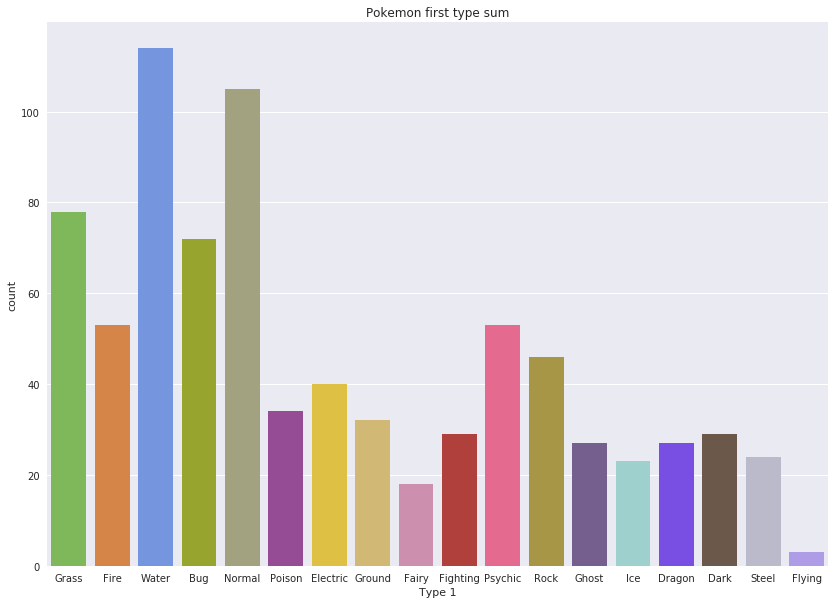

In [29]:
sns.countplot(x="Type 1", data=df_unique, palette=type1_colors).set_title('Pokemon first type sum');

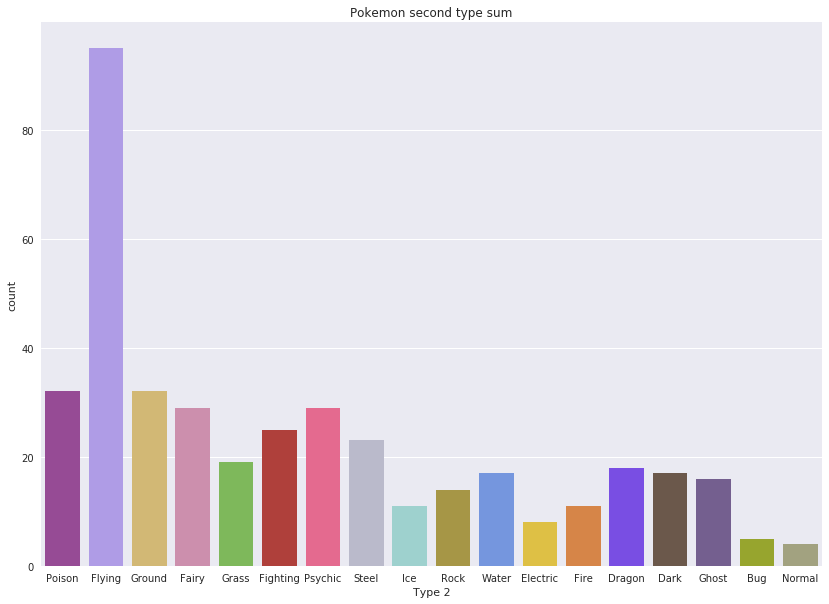

In [30]:
sns.countplot(x="Type 2", data=df_unique, palette=type1_colors).set_title('Pokemon second type sum');

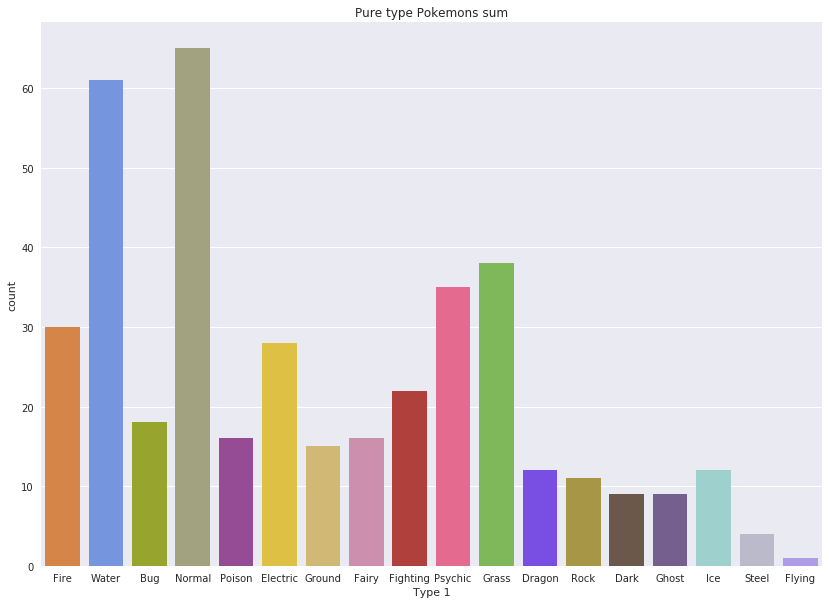

In [31]:
sns.countplot(x="Type 1", data=df_unique.loc[df_unique['Type 2'].isna()], palette=type1_colors).set_title('Pure type Pokemons sum');

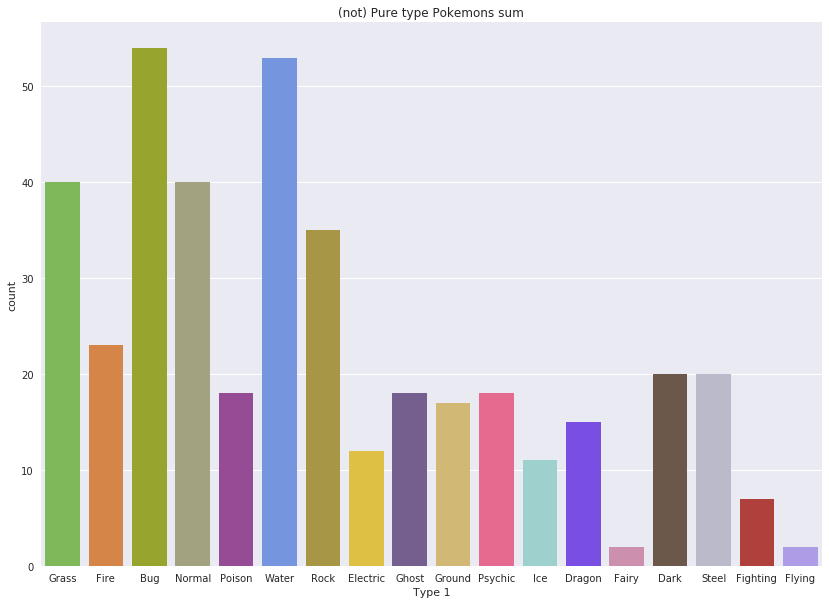

In [32]:
sns.countplot(x="Type 1", data=df_unique.loc[df_unique['Type 2'].notnull()], palette=type1_colors).set_title('(not) Pure type Pokemons sum');

### Create color palette from pokemon type

In [33]:
def get_color_by_type(dataframe):
    palette_by_name = {}
    for index, row in dataframe.iterrows():
        palette_by_name[row['Name']] = type1_colors[row['Type 1']]
    return palette_by_name

No handlers could be found for logger "matplotlib.legend"


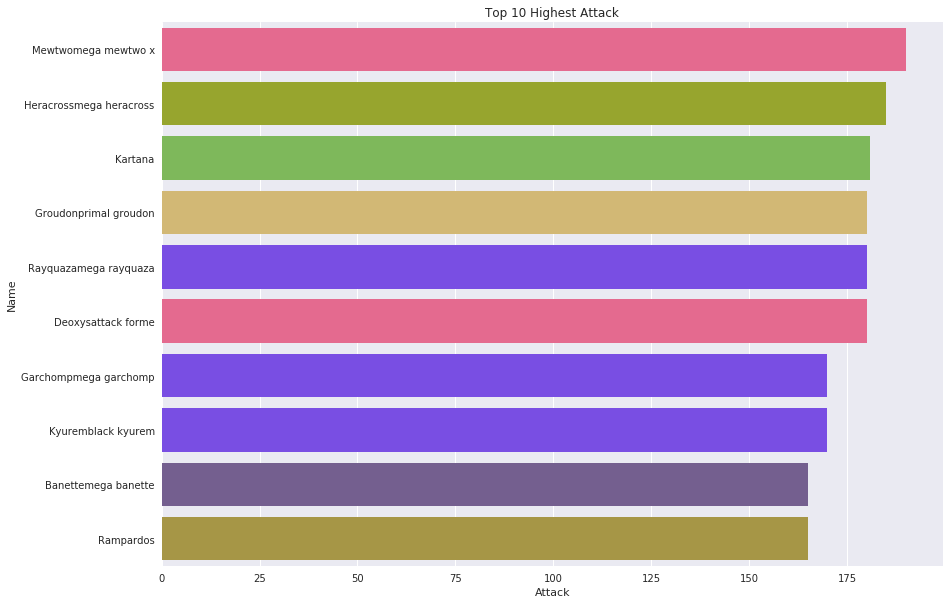

In [34]:
sns.barplot(x="Attack", y='Name', data=df.nlargest(10, 'Attack'), palette=get_color_by_type(df.nlargest(10, 'Attack'))).set_title('Top 10 Highest Attack');
plt.legend()

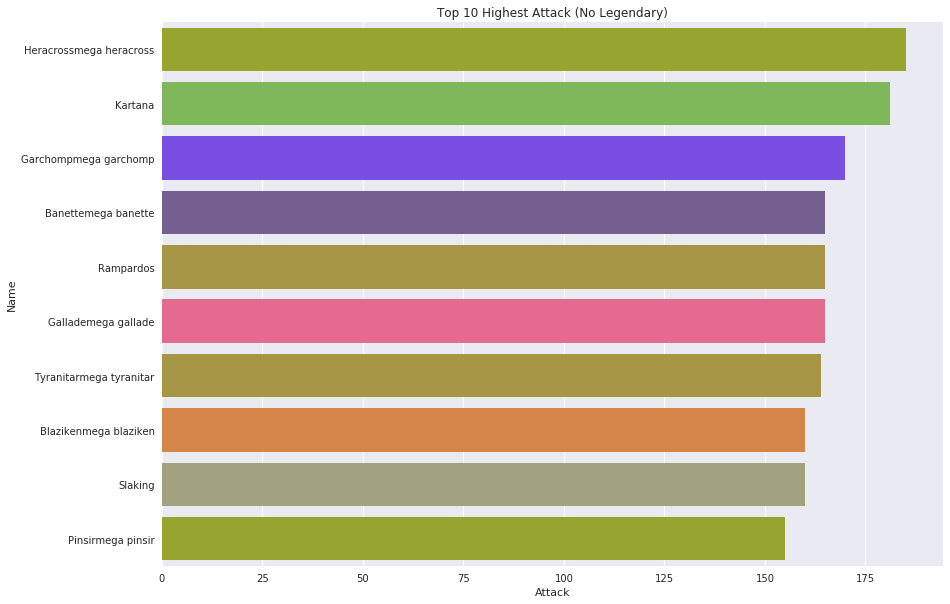

In [36]:
sns.barplot(x="Attack", y='Name', palette=get_color_by_type(df.loc[df.Legendary == False].nlargest(10, 'Attack')), data=df.loc[df.Legendary == False].nlargest(10, 'Attack')).set_title('Top 10 Highest Attack (No Legendary)');

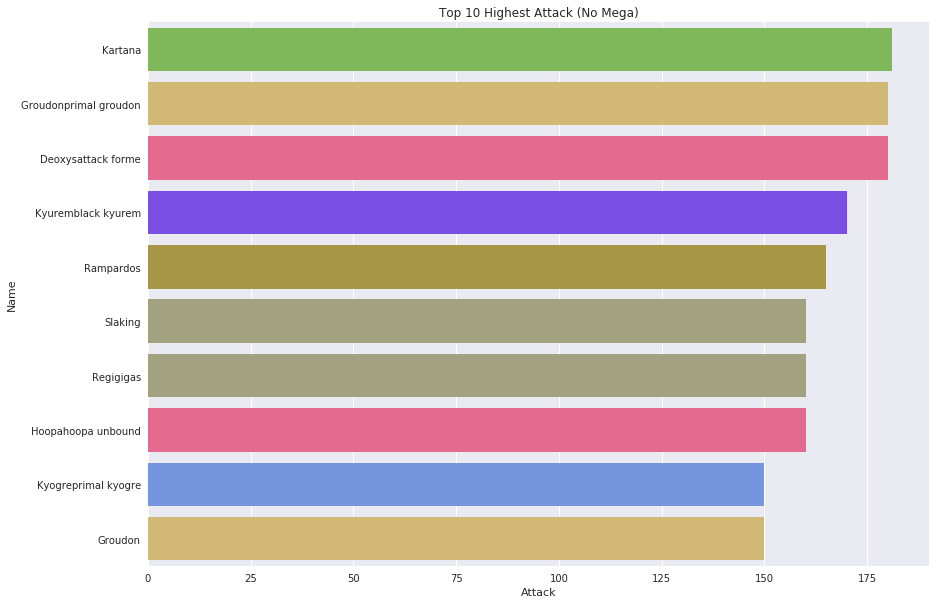

In [37]:
sns.barplot(x="Attack", y='Name', palette=get_color_by_type(df.loc[df.Mega == False].nlargest(10, 'Attack')),data=df.loc[df.Mega == False].nlargest(10, 'Attack')).set_title('Top 10 Highest Attack (No Mega)');

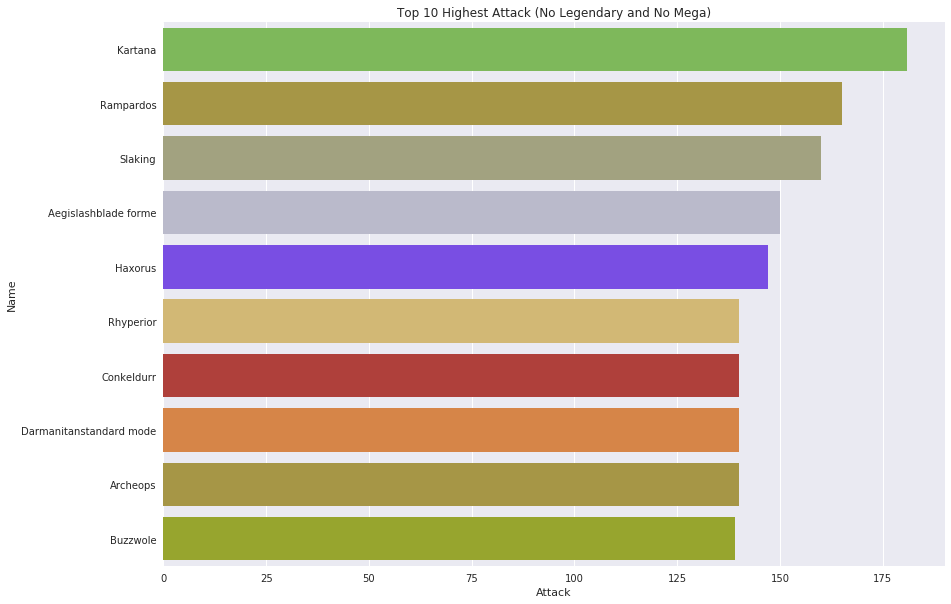

In [38]:
sns.barplot(x="Attack", y='Name',palette=get_color_by_type(df.loc[((df.Legendary == False) & (df.Mega == False) )].nlargest(10, 'Attack')), data=df.loc[((df.Legendary == False) & (df.Mega == False))].nlargest(10, 'Attack')).set_title('Top 10 Highest Attack (No Legendary and No Mega)');

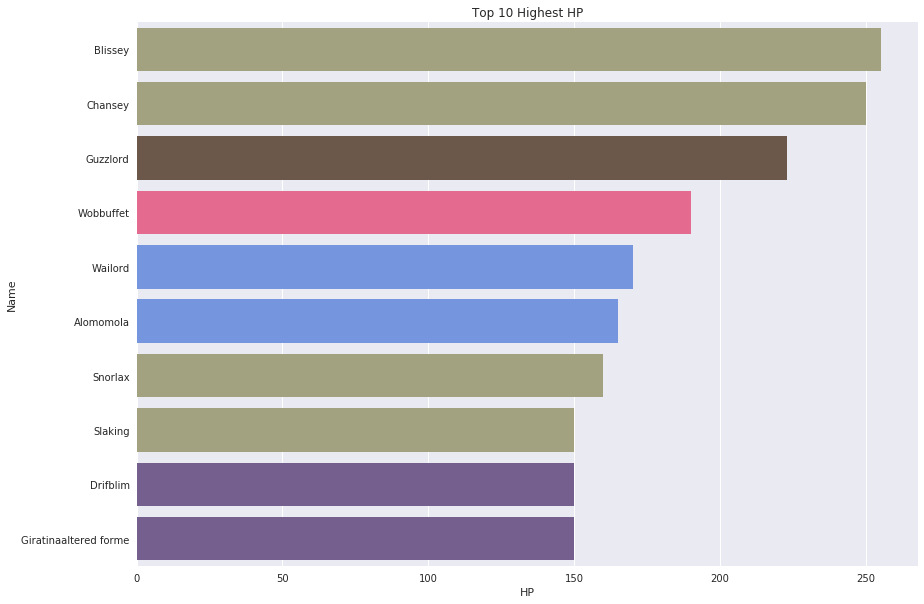

In [39]:
sns.barplot(x="HP", y='Name', palette=get_color_by_type(df.nlargest(10, 'HP')), data=df.nlargest(10, 'HP')).set_title('Top 10 Highest HP');

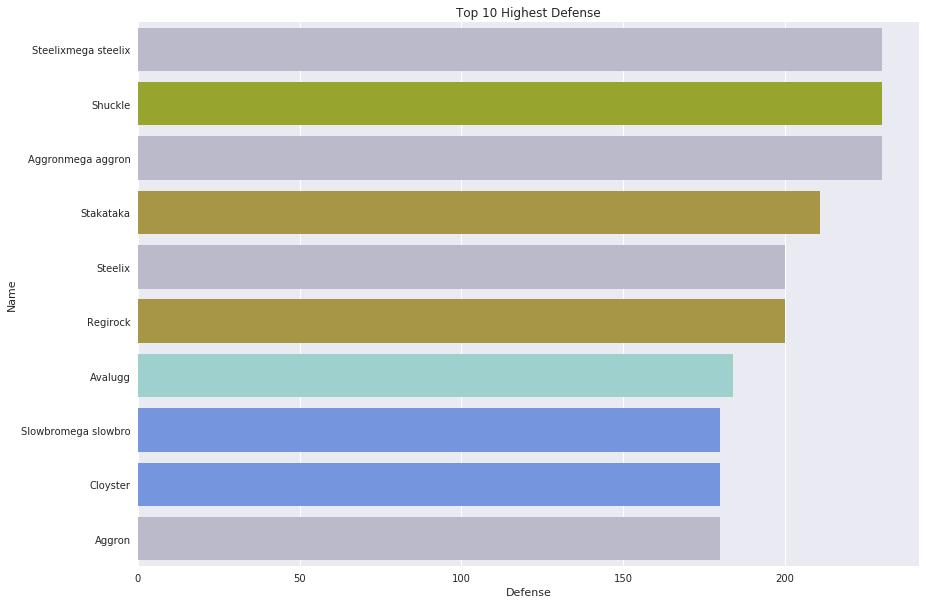

In [40]:
sns.barplot(x="Defense", y='Name', palette=get_color_by_type(df.nlargest(10, 'Defense')),data=df.nlargest(10, 'Defense')).set_title('Top 10 Highest Defense');

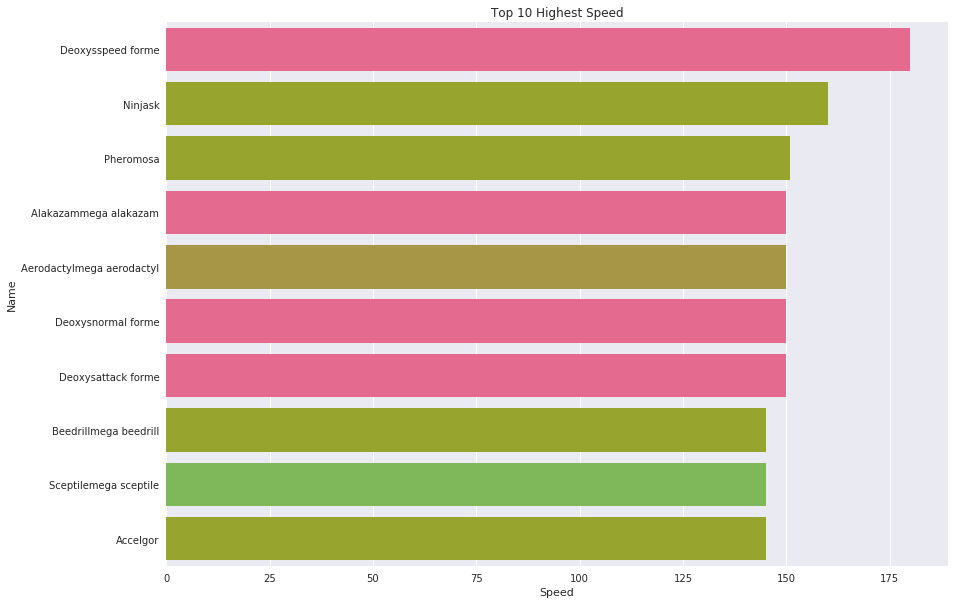

In [41]:
sns.barplot(x="Speed", y='Name', palette=get_color_by_type(df.nlargest(10, 'Speed')), data=df.nlargest(10, 'Speed')).set_title('Top 10 Highest Speed');

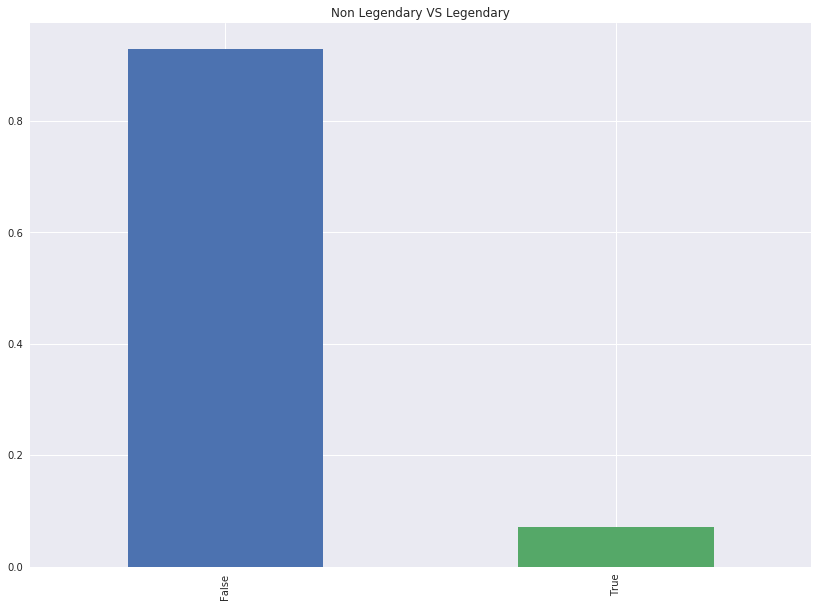

In [42]:
df_unique.Legendary.value_counts(normalize=True).plot(kind='bar', title='Non Legendary VS Legendary');

In [43]:
df.loc[df.Legendary == True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega
156,144,Articuno,Ice,Flying,90.0,85.0,100.0,95.0,125.0,85.0,1.0,True,1.7,55.4,261,False
157,145,Zapdos,Electric,Flying,90.0,90.0,85.0,125.0,90.0,100.0,1.0,True,1.6,52.6,261,False
158,146,Moltres,Fire,Flying,90.0,100.0,90.0,125.0,85.0,90.0,1.0,True,2.0,60.0,261,False
162,150,Mewtwo,Psychic,NaN,106.0,110.0,90.0,154.0,90.0,130.0,1.0,True,2.0,122.0,306,False
163,150,Mewtwomega mewtwo x,Psychic,Fighting,106.0,190.0,100.0,154.0,100.0,130.0,1.0,True,2.0,122.0,306,True
164,150,Mewtwomega mewtwo y,Psychic,NaN,106.0,150.0,70.0,194.0,120.0,140.0,1.0,True,2.0,122.0,306,True
262,243,Raikou,Electric,NaN,90.0,85.0,75.0,115.0,100.0,115.0,2.0,True,1.9,178.0,261,False
263,244,Entei,Fire,NaN,115.0,115.0,85.0,90.0,75.0,100.0,2.0,True,2.1,198.0,261,False
264,245,Suicune,Water,NaN,100.0,75.0,115.0,90.0,115.0,85.0,2.0,True,2.0,187.0,261,False
269,249,Lugia,Psychic,Flying,106.0,90.0,130.0,90.0,154.0,110.0,2.0,True,5.2,216.0,306,False


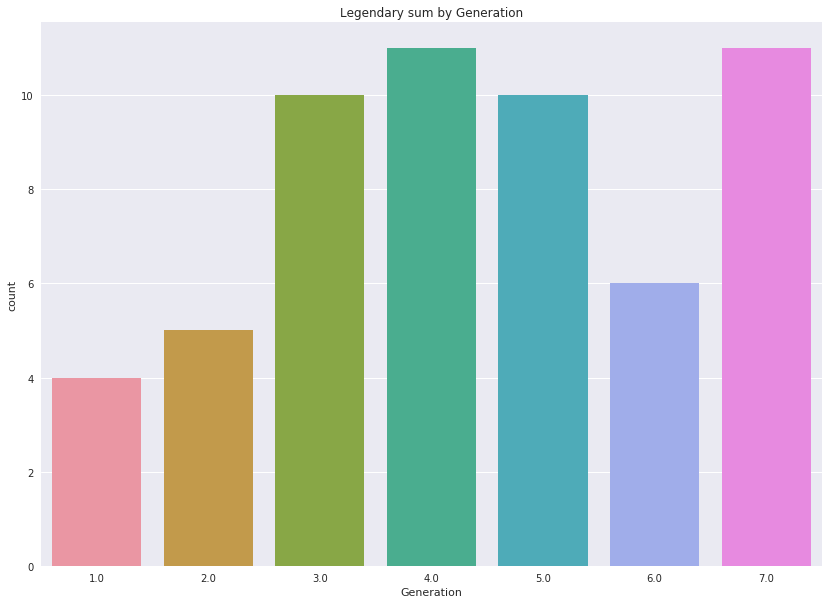

In [44]:
sns.countplot(x="Generation", data=df_unique.loc[df_unique.Legendary == True]).set_title('Legendary sum by Generation');

### Histogram

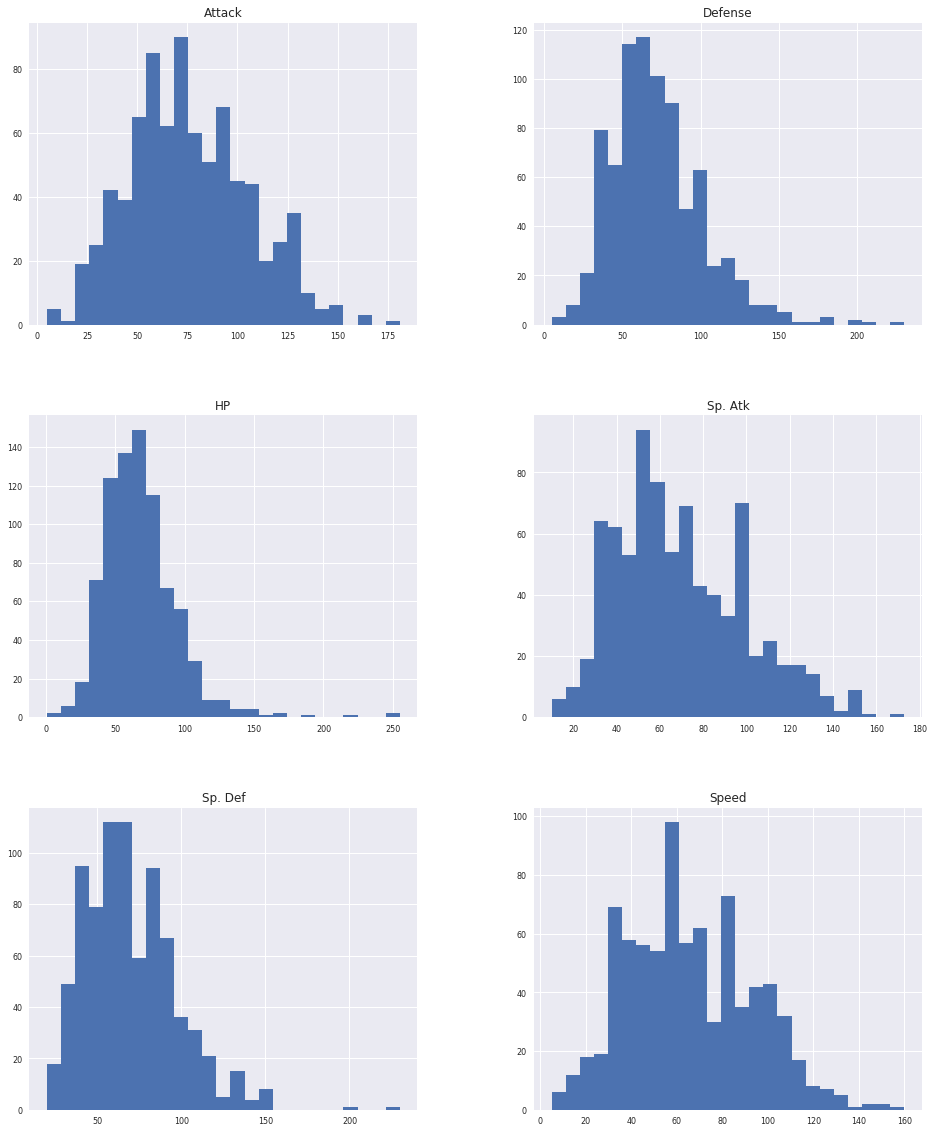

In [45]:
df_num = df_unique[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
df_num.hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8);

### Boxplots

Lets use some boxplots to see more detailed information about the distribution of<br>
HP, Attack, Defense, Sp.Attack, Sp.Defense and Speed.

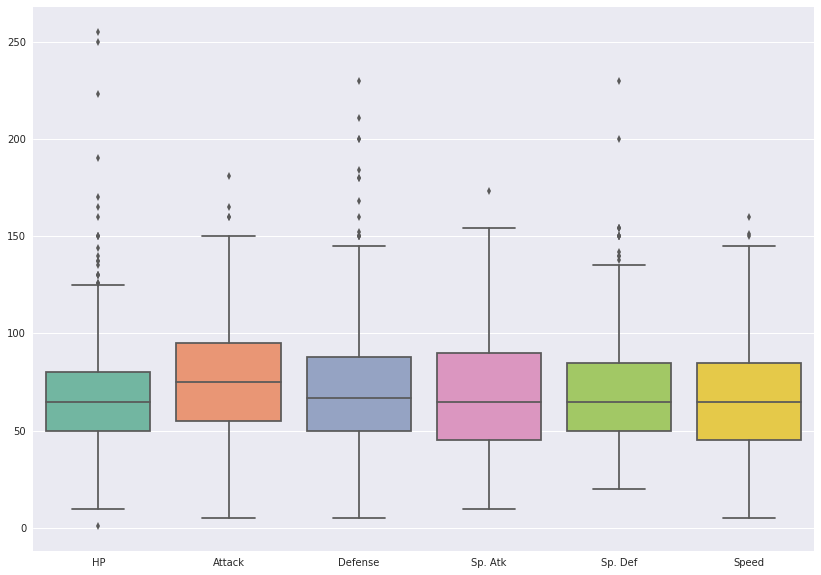

In [46]:
sns.boxplot(data=df_unique[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']], palette="Set2")

## Merge data with level and add 'evolve' column

In [47]:
df_level = pd.read_csv('pokemon evolutions by level.csv')
# df.set_index(['#'], inplace=True)

In [48]:
df_level.head()

,Level,Ndex,MS,Pokémon,Type,Unnamed: 5
0,7,10,NaN,Caterpie,Bug,NaN
1,7,13,NaN,Weedle,Bug,Poison
2,7,265,NaN,Wurmple,Bug,NaN
3,9,664,NaN,Scatterbug,Bug,NaN
4,10,11,NaN,Metapod,Bug,NaN


In [49]:
df_level.tail()

,Level,Ndex,MS,Pokémon,Type,Unnamed: 5
276,54,629,NaN,Vullaby,Dark,Flying
277,55,148,NaN,Dragonair,Dragon,NaN
278,55,247,NaN,Pupitar,Rock,Ground
279,59,636,NaN,Larvesta,Bug,Fire
280,64,634,NaN,Zweilous,Dark,Dragon


In [50]:
df['Evolve at'] = 0
df['Evolve'] = False
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False,0,False
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False,0,False
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False,0,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True,0,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False,0,False


In [51]:
for index, row in df_level.iterrows():
    df.loc[df['#'] == row['Ndex'], 'Evolve at'] = row['Level']
    df.loc[df['#'] == row['Ndex'], 'Evolve'] = True

df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,0.7,6.9,64,False,16,True
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,1.0,13.0,142,False,32,True
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,2.0,100.0,236,False,0,False
3,3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,2.0,100.0,236,True,0,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,0.6,8.5,62,False,16,True


In [52]:
df.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience,Mega,Evolve at,Evolve
881,803,Poipole,Poison,NaN,67.0,73.0,67.0,73.0,67.0,73.0,7.0,False,0.6,1.8,189,False,0,False
882,804,Naganadel,Poison,Dragon,73.0,73.0,73.0,127.0,73.0,121.0,7.0,False,3.6,150.0,243,False,0,False
883,805,Stakataka,Rock,Steel,61.0,131.0,211.0,53.0,101.0,13.0,7.0,False,5.5,820.0,257,False,0,False
884,806,Blacephalon,Fire,Ghost,53.0,127.0,53.0,151.0,79.0,107.0,7.0,False,1.8,13.0,257,False,0,False
885,807,Zeraora,Electric,NaN,88.0,112.0,75.0,102.0,80.0,143.0,7.0,False,1.5,44.5,270,False,0,False


In [53]:
df_unique = df.drop_duplicates(subset="#")

### Starters

In [54]:
df_starters1 = df.loc[df['#'].isin([1, 4,7,
                           152, 155,158,
                           252,255,258,
                           387,390,393,
                           495,498,501,
                           650,653,656,
                            722, 725, 728
                          ])]
df_starters1.filter(['Name', 'Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Height','Weight','Base Experience','Evolve at'])

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Height,Weight,Base Experience,Evolve at
0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.7,6.9,64,16
4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.6,8.5,62,16
9,Squirtle,Water,NaN,44.0,48.0,65.0,50.0,64.0,43.0,1.0,0.5,9.0,63,16
166,Chikorita,Grass,NaN,45.0,49.0,65.0,49.0,65.0,45.0,2.0,0.9,6.4,64,16
169,Cyndaquil,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,2.0,0.5,7.9,62,14
172,Totodile,Water,NaN,50.0,65.0,64.0,44.0,48.0,43.0,2.0,0.6,9.5,63,18
272,Treecko,Grass,NaN,40.0,45.0,35.0,65.0,55.0,70.0,3.0,0.5,5.0,62,16
276,Torchic,Fire,NaN,45.0,60.0,40.0,70.0,50.0,45.0,3.0,0.4,2.5,62,16
280,Mudkip,Water,NaN,50.0,70.0,50.0,50.0,50.0,40.0,3.0,0.4,7.6,62,16
432,Turtwig,Grass,NaN,55.0,68.0,64.0,45.0,55.0,31.0,4.0,0.4,10.2,64,18


In [55]:
df_starters1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 806
Data columns (total 18 columns):
#                  21 non-null int64
Name               21 non-null object
Type 1             21 non-null object
Type 2             2 non-null object
HP                 21 non-null float64
Attack             21 non-null float64
Defense            21 non-null float64
Sp. Atk            21 non-null float64
Sp. Def            21 non-null float64
Speed              21 non-null float64
Generation         21 non-null float64
Legendary          21 non-null bool
Height             21 non-null float64
Weight             21 non-null float64
Base Experience    21 non-null int64
Mega               21 non-null bool
Evolve at          21 non-null int64
Evolve             21 non-null bool
dtypes: bool(3), float64(9), int64(3), object(3)
memory usage: 2.7+ KB


In [56]:
df_starters2 = df.loc[df['#'].isin([2,5,8,
                           153, 156,159,
                           253,256,259,
                           388,391,394,
                           496,499,502,
                           651,654,657,
                            723, 726, 729
                          ])]
df_starters2.filter(['Name', 'Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Height','Weight','Base Experience','Evolve at'])

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Height,Weight,Base Experience,Evolve at
1,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,1.0,13.0,142,32
5,Charmeleon,Fire,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1.0,1.1,19.0,142,36
10,Wartortle,Water,NaN,59.0,63.0,80.0,65.0,80.0,58.0,1.0,1.0,22.5,142,36
167,Bayleef,Grass,NaN,60.0,62.0,80.0,63.0,80.0,60.0,2.0,1.2,15.8,142,32
170,Quilava,Fire,NaN,58.0,64.0,58.0,80.0,65.0,80.0,2.0,0.9,19.0,142,36
173,Croconaw,Water,NaN,65.0,80.0,80.0,59.0,63.0,58.0,2.0,1.1,25.0,142,30
273,Grovyle,Grass,NaN,50.0,65.0,45.0,85.0,65.0,95.0,3.0,0.9,21.6,142,36
277,Combusken,Fire,Fighting,60.0,85.0,60.0,85.0,60.0,55.0,3.0,0.9,19.5,142,36
281,Marshtomp,Water,Ground,70.0,85.0,70.0,60.0,70.0,50.0,3.0,0.7,28.0,142,36
433,Grotle,Grass,NaN,75.0,89.0,85.0,55.0,65.0,36.0,4.0,1.1,97.0,142,32


In [57]:
df_starters3 = df.loc[df['#'].isin([3,6,9,
                           154, 157,160,
                           254,257,260,
                           389,392,395,
                           497,500,503,
                           652,655,658,
                            724, 727, 730
                          ])]
df_starters3.filter(['Name', 'Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Height','Weight','Base Experience','Evolve at'])

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Height,Weight,Base Experience,Evolve at
2,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,2.0,100.0,236,0
3,Venusaurmega venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,2.0,100.0,236,0
6,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,1.7,90.5,240,0
7,Charizardmega charizard x,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,1.7,90.5,240,0
8,Charizardmega charizard y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,1.7,90.5,240,0
11,Blastoise,Water,NaN,79.0,83.0,100.0,85.0,105.0,78.0,1.0,1.6,85.5,239,0
12,Blastoisemega blastoise,Water,NaN,79.0,103.0,120.0,135.0,115.0,78.0,1.0,1.6,85.5,239,0
168,Meganium,Grass,NaN,80.0,82.0,100.0,83.0,100.0,80.0,2.0,1.8,100.5,236,0
171,Typhlosion,Fire,NaN,78.0,84.0,78.0,109.0,85.0,100.0,2.0,1.7,79.5,240,0
174,Feraligatr,Water,NaN,85.0,105.0,100.0,79.0,83.0,78.0,2.0,2.3,88.8,239,0


### Starters Visualizations

Here we have starters status ('HP',' Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height', 'Weight').

In [58]:
print("======================================================================")
for ix, dt in enumerate([df_starters1, df_starters2, df_starters3]):
    print("Pokemon stage {}".format(ix+1))
    for i,x in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']):
        max = dt.nlargest(1, x)
        print("Pokemon with highest {} is: {} (Generation: {})".format(x, max['Name'].values[0], max['Generation'].values[0]))
    print("======================================================================")

Pokemon stage 1
Pokemon with highest HP is: Rowlet (Generation: 7.0)
Pokemon with highest Attack is: Mudkip (Generation: 3.0)
Pokemon with highest Defense is: Squirtle (Generation: 1.0)
Pokemon with highest Sp. Atk is: Torchic (Generation: 3.0)
Pokemon with highest Sp. Def is: Bulbasaur (Generation: 1.0)
Pokemon with highest Speed is: Froakie (Generation: 6.0)
Pokemon stage 2
Pokemon with highest HP is: Pignite (Generation: 5.0)
Pokemon with highest Attack is: Pignite (Generation: 5.0)
Pokemon with highest Defense is: Quilladin (Generation: 6.0)
Pokemon with highest Sp. Atk is: Brionne (Generation: 7.0)
Pokemon with highest Sp. Def is: Brionne (Generation: 7.0)
Pokemon with highest Speed is: Frogadier (Generation: 6.0)
Pokemon stage 3
Pokemon with highest HP is: Emboar (Generation: 5.0)
Pokemon with highest Attack is: Blazikenmega blaziken (Generation: 3.0)
Pokemon with highest Defense is: Venusaurmega venusaur (Generation: 1.0)
Pokemon with highest Sp. Atk is: Charizardmega charizard 

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


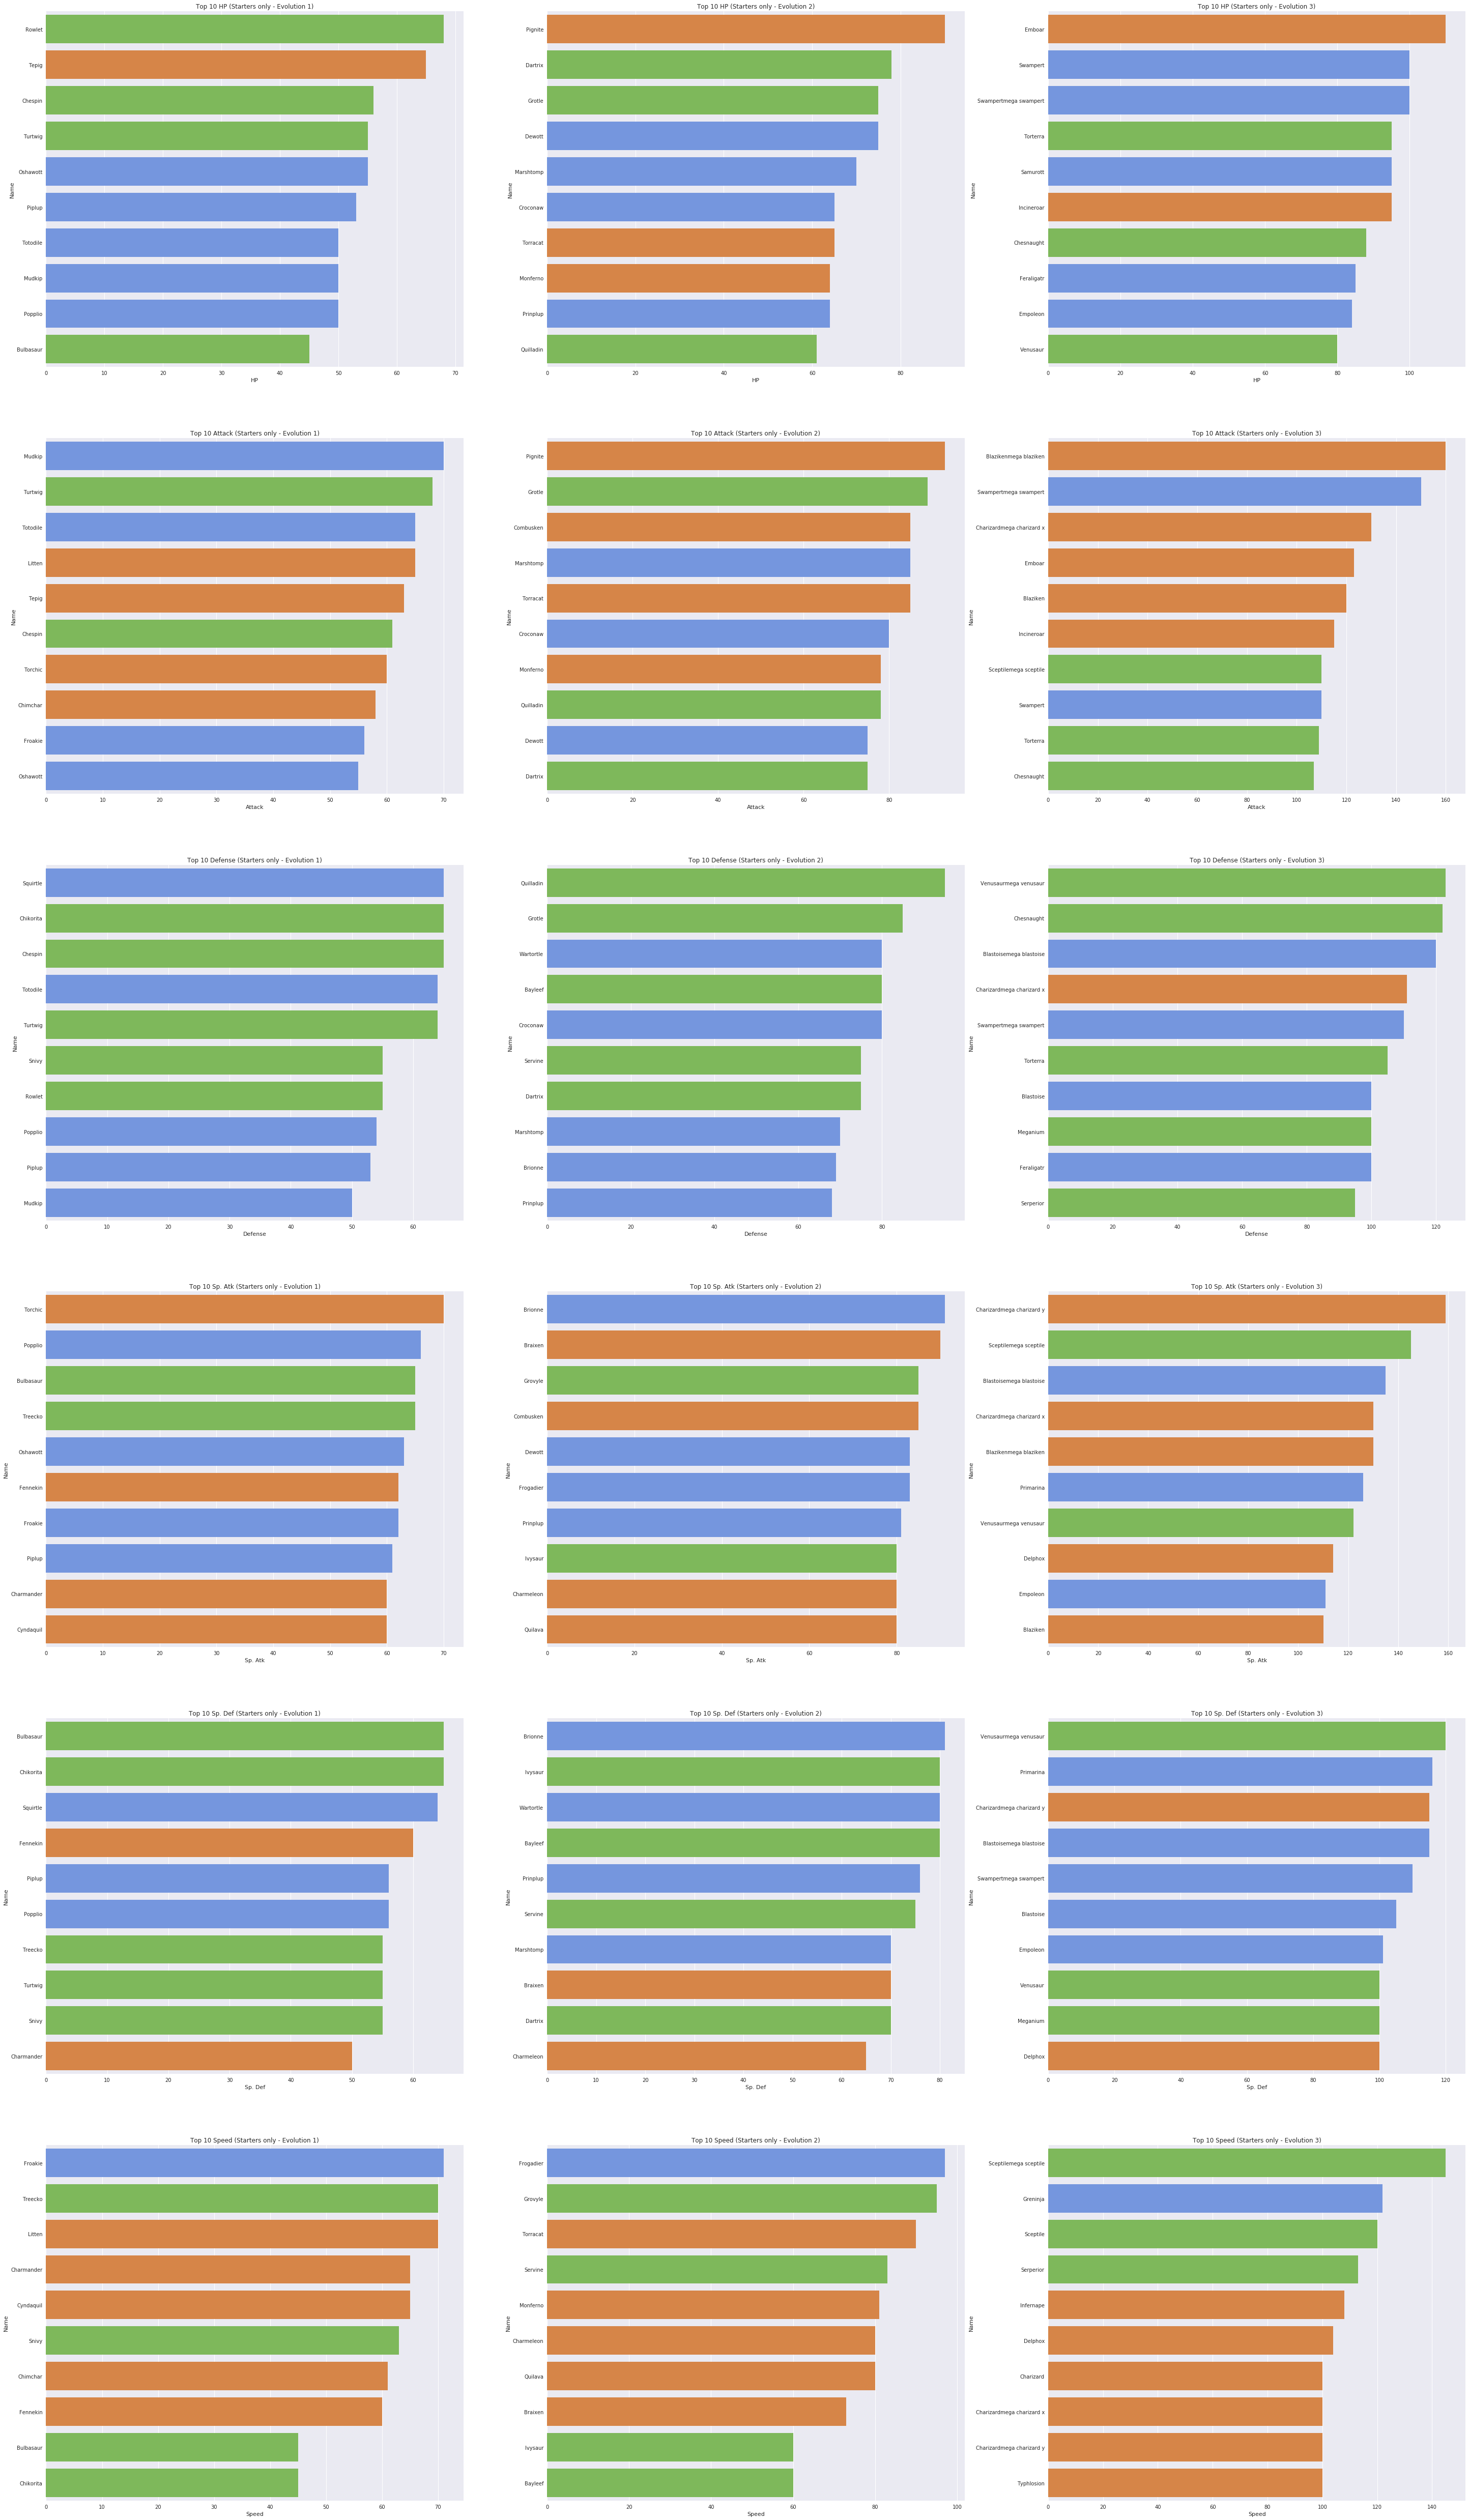

In [59]:
plot_index = 0
fig, ax = plt.subplots(6,3, figsize=[50,90])
ax = ax.flatten()
for i, x in enumerate(['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']):
    for j, z in enumerate([df_starters1, df_starters2, df_starters3]):
        sns.barplot(x=x, y='Name', palette=get_color_by_type(z.nlargest(10, x)), ax=ax[plot_index], data=z.nlargest(10, x)).set_title('Top 10 ' + str(x) + ' (Starters only - Evolution ' + str(j+1) + ')')
        plot_index = plot_index + 1
fig.show()

To see the entire image (desktop mode): https://i.imgur.com/9pKYiNO.png

#### Radar Chart Status

Here we'll get a better visualization using radar chart, now lets check each Pokemon again.

In [60]:
def radar(dt, stage):
    fig = plt.figure(figsize=(18,30))
    fig.suptitle('Starters - Stage {} - Generation 1 to 7'.format(stage), fontsize=16)
    #fig, axes = plot.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

    for i, x in enumerate(dt['Name']):
        df_pk = df.loc[df['Name']==x]
        pk_index = df_pk.index[0]

        #print(df_pk['Type 1'].values)
        #print(type1_colors[df_pk['Type 1'].values[0]])

        type_color = type1_colors[df_pk['Type 1'].values[0]]

        labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
        stats=df.loc[pk_index,labels].values

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))

        ax=plt.subplot(7,3,i+1, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2, color=type_color)
        ax.fill(angles, stats, alpha=0.25, color=type_color)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.set_title([df.loc[pk_index,"Name"]][0])
    plt.show()

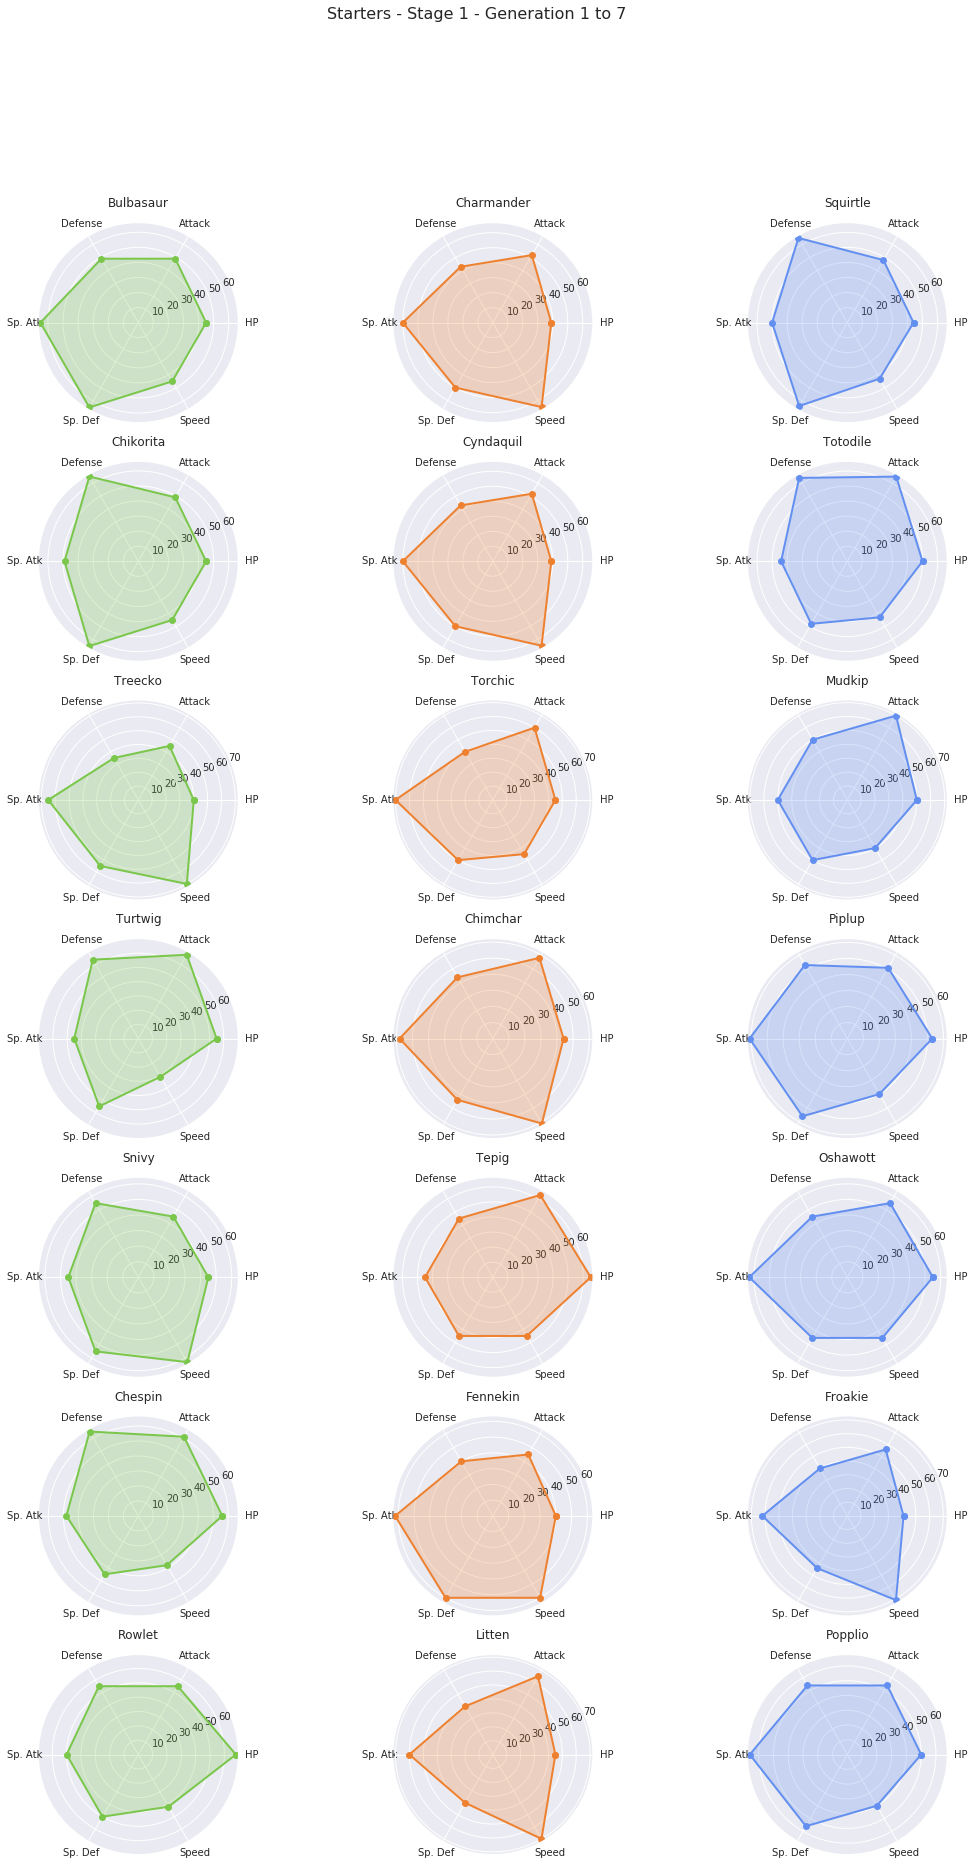

In [61]:
radar(df_starters1, 1)

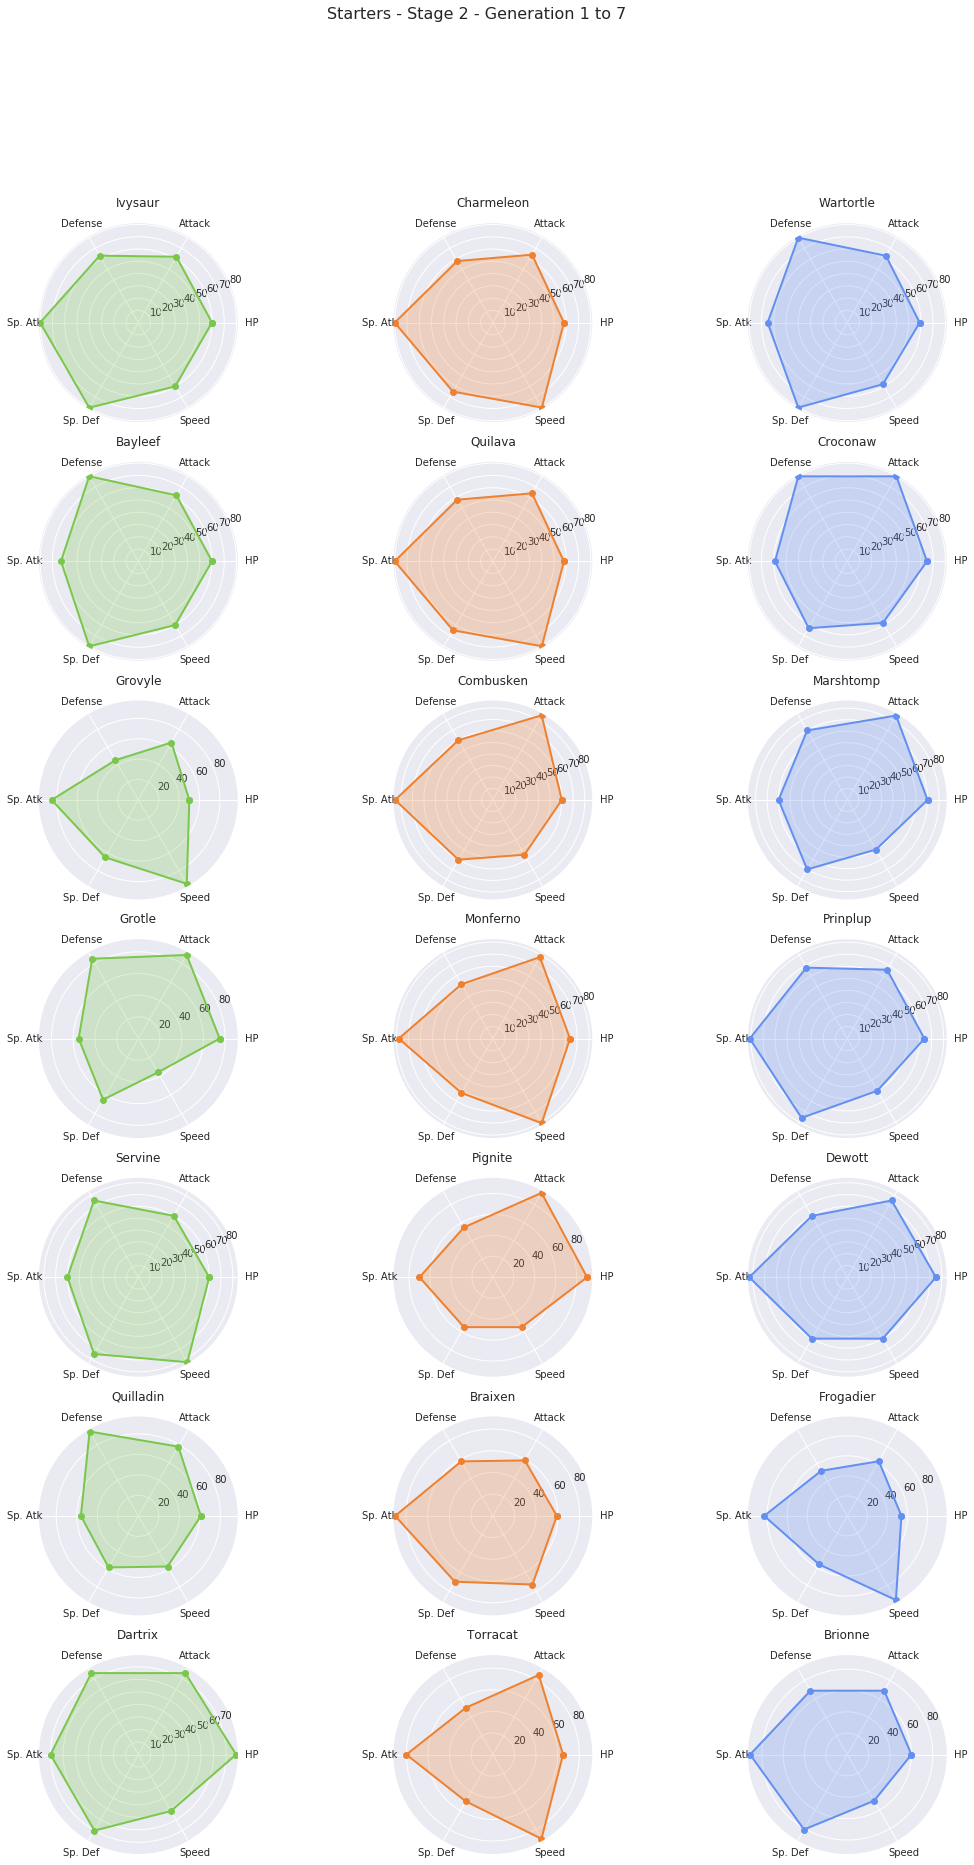

In [62]:
radar(df_starters2, 2)

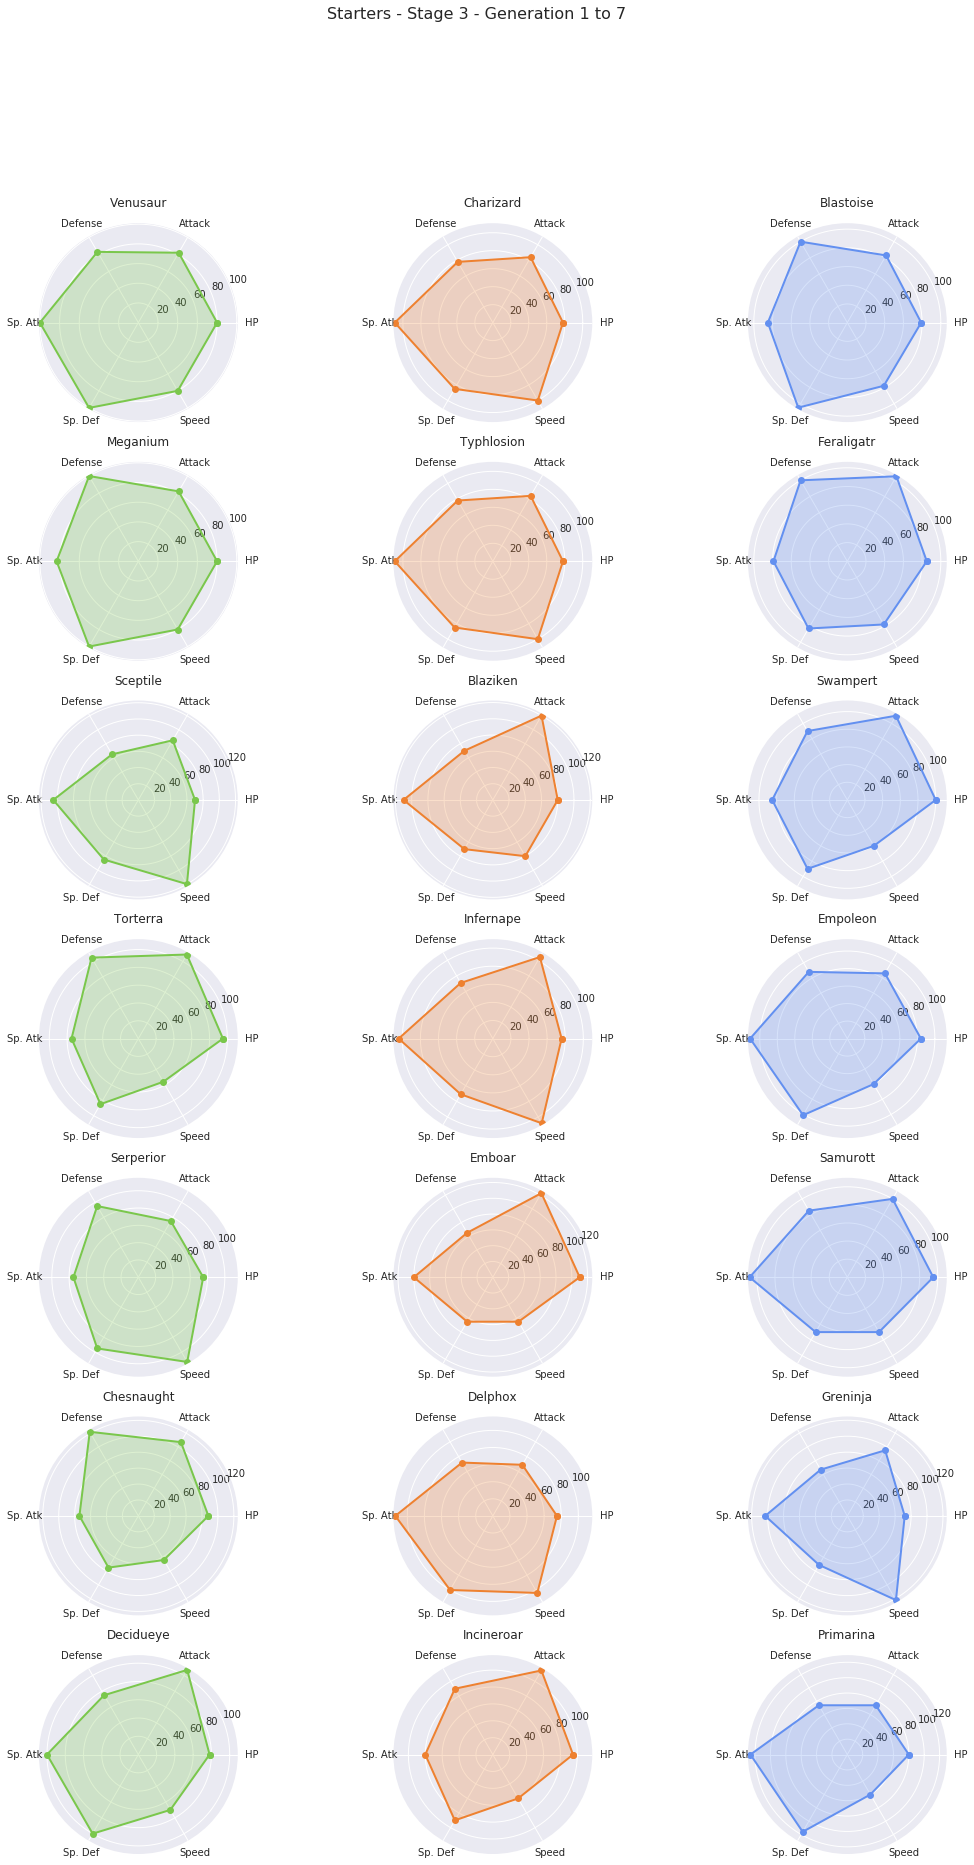

In [63]:
radar(df_starters3.loc[df_starters3['Mega'] == False], 3)